# CMPS 320 Final Project - Divorce Dataset Analysis

## Importing packages

In [32]:
# imports
import warnings
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

from sklearn import decomposition
from sklearn import preprocessing
from sklearn import metrics



%matplotlib inline
plt.style.use('seaborn-white')

warnings.filterwarnings('ignore')


## Loading, cleaning, and exploring dataset

Our report aims to focus itself around the `Divorce Predictors` dataset. The dataset itself consists of data coming from 150 Turkish couples; 84 divorced, and 86 currently married, who completed an assessment aimed at getting a basic understanding of the couple, and their relationship. The data has 170 instances, containing 54 predictors in the form of a written question. These predictors are then divided into a 0-5 scale (inclusive), with:


+ 0 = Never
+ 1 = Seldom
+ 2 = Averagely
+ 3 = Frequently
+ 4 = Always

The following questions are predictors in our dataframe that we will be using to assess ...

In [2]:
divorces = pd.read_csv('divorce.csv', delimiter=';')
divorces = divorces.sample(frac=1, random_state=42) # we want a more randomized spread of our data for when we visualize it

divorces.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
139,3,1,1,0,0,0,0,0,0,0,...,3,2,2,0,2,2,0,0,4,0
30,3,4,3,2,3,0,1,4,3,2,...,4,4,4,4,4,4,4,4,4,1
119,0,1,1,0,0,2,0,0,0,0,...,2,2,2,0,2,1,1,1,0,0
29,4,3,3,2,4,1,0,3,3,2,...,4,4,4,4,4,4,4,4,4,1
144,0,0,2,4,0,0,0,0,0,2,...,2,0,2,4,0,0,1,0,0,0


In [3]:
# hide this
questionSet= [
    '1 If one of us apologizes when our discussion deteriorates, the discussion ends.',
    '2 I know we can ignore our differences, even if things get hard sometimes.',
    '3 When we need it, we can take our discussions with my spouse from the beginning and correct it.',
    '4 When I discuss with my spouse, to contact him will eventually work.',
    '5 The time I spent with my wife is special for us.',
    '6 We don\'t have time at home as partners.',
    '7 We are like two strangers who share the same environment at home rather than family.',
    '8 I enjoy our holidays with my wife.',
    '9 I enjoy traveling with my wife.',
    '10 Most of our goals are common to my spouse.',
    '11 I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other.',
    '12 My spouse and I have similar values in terms of personal freedom.',
    '13 My spouse and I have similar sense of entertainment.',
    '14 Most of our goals for people (children, friends, etc) are the same.',
    '15 Our dreams with my spouse are similar and harmonious.',
    '16 We\'re compatible with my spouse about what love should be.',
    '17 We share the same views about being happy in our life with my spouse.',
    '18 My spouse and I have similar ideas about how marriage should be.',
    '19 My spouse and I have similar ideas about how roles should be in marriage.',
    '20 My spouse and I have similar values in trust.',
    '21 I know exactly what my wife likes.',
    '22 I know how my spouse wants to be taken care of when she/he sick.',
    '23 I know my spouse\'s favorite food.',
    '24 I can tell you what kind of stress my spouse is facing in her/his life.',
    '25 I have knowledge of my spouse\'s inner world.',
    '26 I know my spouse\'s basic anxieties.',
    '27 I know what my spouse\'s current sources of stress are.',
    '28 I know my spouse\'s hopes and wishes.',
    '29 I know my spouse very well.',
    '30 I know my spouse\'s friends and their social relationships.',
    '31 I feel aggressive when I argue with my spouse.',
    "32 When discussing with my spouse, I usually use expressions such as 'you always' or 'you never'.",
    '33 I can use negative statements about my spouse\'s personality during our discussions.',
    '34 I can use offensive expressions during our discussions.',
    '35 I can insult my spouse during our discussions.',
    '36 I can be humiliating when we discussions.',
    '37 My discussion with my spouse is not calm.',
    '38 I hate my spouse\'s way of open a subject.',
    '39 Our discussions often occur suddenly.',
    '40 We\'re just starting a discussion before I know what\'s going on.',
    '41 When I talk to my spouse about something, my calm suddenly breaks.',
    '42 When I argue with my spouse, I only go out and I don\'t say a word.',
    '43 I mostly stay silent to calm the environment a little bit.',
    '44 Sometimes I think it\'s good for me to leave home for a while.',
    '45 I\'d rather stay silent than discuss with my spouse.',
    '46 Even if I\'m right in the discussion, I stay silent to hurt my spouse.',
    '47 When I discuss with my spouse, I stay silent because I am afraid of not being able to control my anger.',
    '48 I feel right in our discussions.',
    '49 I have nothing to do with what I\'ve been accused of.',
    '50 I\'m not actually the one who\'s guilty about what I\'m accused of.',
    '51 I\'m not the one who\'s wrong about problems at home.',
    '52 I wouldn\'t hesitate to tell my spouse about her/his inadequacy.',
    '53 When I discuss, I remind my spouse of her/his inadequacy.',
    '54 I\'m not afraid to tell my spouse about her/his incompetence.'
]

In [4]:
questions = divorces.drop(['Divorce'], axis=1).columns
perc = {}
for col in questions:
    perc[col] = round(divorces[col].value_counts(normalize=True)*100, 2)
result = pd.DataFrame(perc).T
result.index = questionSet

# get this to save and format for display(result)
result.style.highlight_max(color='green', axis=1).highlight_min(color='red', axis=1).format('{:.0f}%')


,0,1,2,3,4
"1 If one of us apologizes when our discussion deteriorates, the discussion ends.",41%,5%,8%,28%,18%
"2 I know we can ignore our differences, even if things get hard sometimes.",35%,14%,16%,22%,13%
"3 When we need it, we can take our discussions with my spouse from the beginning and correct it.",30%,14%,15%,31%,10%
"4 When I discuss with my spouse, to contact him will eventually work.",44%,7%,18%,19%,12%
5 The time I spent with my wife is special for us.,48%,6%,5%,26%,15%
6 We don't have time at home as partners.,51%,29%,17%,2%,1%
7 We are like two strangers who share the same environment at home rather than family.,67%,25%,3%,2%,3%
8 I enjoy our holidays with my wife.,48%,6%,12%,22%,12%
9 I enjoy traveling with my wife.,49%,4%,8%,29%,10%
10 Most of our goals are common to my spouse.,36%,11%,22%,20%,11%


In [5]:
divorces.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 139 to 102
Data columns (total 55 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Q1       170 non-null    int64
 1   Q2       170 non-null    int64
 2   Q3       170 non-null    int64
 3   Q4       170 non-null    int64
 4   Q5       170 non-null    int64
 5   Q6       170 non-null    int64
 6   Q7       170 non-null    int64
 7   Q8       170 non-null    int64
 8   Q9       170 non-null    int64
 9   Q10      170 non-null    int64
 10  Q11      170 non-null    int64
 11  Q12      170 non-null    int64
 12  Q13      170 non-null    int64
 13  Q14      170 non-null    int64
 14  Q15      170 non-null    int64
 15  Q16      170 non-null    int64
 16  Q17      170 non-null    int64
 17  Q18      170 non-null    int64
 18  Q19      170 non-null    int64
 19  Q20      170 non-null    int64
 20  Q21      170 non-null    int64
 21  Q22      170 non-null    int64
 22  Q23      170 non-null   

In [6]:
divorces['Divorce'].value_counts() # roughly half of these couples are happily married, and (roughly) the other half of them are currently divorced

0    86
1    84
Name: Divorce, dtype: int64

We can see here that we have no missing data, and everything that we are expecting to see is accounted for. With that, we can move forward. We wanted to include an easy way of interpreting the way that our couples ranked in regard to their answers for each question, so we created an `avg_score` column that indicates the mean score of all of their answers across the assessment.

In [7]:
y = divorces['Divorce']
X = divorces.drop('Divorce', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=42)


In [8]:
corr = divorces.iloc[:,:-1].corr()
cmap = sn.diverging_palette(5, 250, as_cmap=True)
corr.style.background_gradient(cmap, axis=1).set_properties(**{'max-width': '80px', 'font-size': '10pt'}).set_precision(2)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54
Q1,1.00,0.82,0.83,0.83,0.88,0.29,0.43,0.80,0.85,0.79,0.89,0.79,0.84,0.82,0.85,0.83,0.90,0.85,0.90,0.84,0.82,0.79,0.82,0.81,0.82,0.80,0.83,0.76,0.86,0.79,0.70,0.74,0.80,0.75,0.80,0.81,0.79,0.80,0.82,0.84,0.80,0.64,0.48,0.75,0.51,0.40,0.58,0.63,0.67,0.73,0.68,0.58,0.61,0.77
Q2,0.82,1.00,0.81,0.79,0.82,0.10,0.42,0.86,0.83,0.78,0.82,0.86,0.79,0.88,0.80,0.81,0.82,0.88,0.83,0.88,0.79,0.80,0.77,0.87,0.77,0.86,0.82,0.78,0.79,0.84,0.66,0.74,0.76,0.71,0.75,0.78,0.75,0.75,0.79,0.79,0.78,0.65,0.50,0.70,0.49,0.39,0.62,0.64,0.66,0.68,0.64,0.54,0.61,0.73
Q3,0.83,0.81,1.00,0.81,0.80,0.26,0.46,0.76,0.82,0.75,0.81,0.78,0.76,0.75,0.81,0.78,0.81,0.80,0.80,0.81,0.80,0.73,0.71,0.74,0.72,0.73,0.80,0.69,0.76,0.75,0.65,0.75,0.73,0.70,0.73,0.74,0.74,0.74,0.76,0.78,0.74,0.57,0.39,0.66,0.43,0.31,0.54,0.64,0.65,0.66,0.60,0.49,0.60,0.67
Q4,0.83,0.79,0.81,1.00,0.82,0.19,0.47,0.80,0.83,0.87,0.81,0.79,0.75,0.76,0.79,0.88,0.81,0.84,0.83,0.82,0.78,0.84,0.74,0.78,0.74,0.76,0.77,0.83,0.78,0.77,0.66,0.75,0.76,0.73,0.77,0.79,0.76,0.79,0.76,0.80,0.77,0.64,0.45,0.71,0.45,0.34,0.55,0.63,0.70,0.69,0.62,0.53,0.59,0.70
Q5,0.88,0.82,0.80,0.82,1.00,0.30,0.38,0.88,0.92,0.82,0.94,0.85,0.92,0.85,0.88,0.85,0.95,0.89,0.94,0.89,0.87,0.84,0.89,0.83,0.89,0.84,0.88,0.81,0.93,0.84,0.79,0.83,0.88,0.83,0.88,0.89,0.86,0.85,0.87,0.87,0.86,0.74,0.61,0.80,0.59,0.47,0.72,0.66,0.76,0.80,0.74,0.66,0.72,0.84
Q6,0.29,0.10,0.26,0.19,0.30,1.00,0.42,0.18,0.30,0.27,0.34,0.21,0.31,0.22,0.32,0.31,0.38,0.25,0.37,0.23,0.27,0.22,0.25,0.19,0.29,0.20,0.28,0.25,0.31,0.27,0.25,0.32,0.29,0.28,0.28,0.29,0.28,0.30,0.30,0.35,0.33,0.23,0.17,0.34,0.09,0.13,0.21,0.20,0.20,0.22,0.18,0.21,0.26,0.29
Q7,0.43,0.42,0.46,0.47,0.38,0.42,1.00,0.41,0.52,0.50,0.43,0.51,0.37,0.49,0.49,0.57,0.46,0.54,0.47,0.54,0.41,0.38,0.25,0.45,0.29,0.44,0.44,0.35,0.35,0.45,0.33,0.44,0.40,0.33,0.35,0.37,0.43,0.40,0.48,0.50,0.45,0.33,0.15,0.43,0.20,0.07,0.25,0.31,0.29,0.33,0.35,0.24,0.31,0.35
Q8,0.80,0.86,0.76,0.80,0.88,0.18,0.41,1.00,0.92,0.83,0.89,0.89,0.84,0.89,0.87,0.87,0.88,0.94,0.87,0.92,0.86,0.86,0.85,0.90,0.81,0.88,0.85,0.82,0.86,0.90,0.72,0.76,0.82,0.78,0.83,0.85,0.80,0.82,0.80,0.82,0.82,0.70,0.56,0.76,0.54,0.43,0.68,0.59,0.67,0.73,0.69,0.66,0.71,0.81
Q9,0.85,0.83,0.82,0.83,0.92,0.30,0.52,0.92,1.00,0.85,0.91,0.87,0.87,0.87,0.95,0.89,0.92,0.93,0.92,0.90,0.91,0.85,0.85,0.85,0.84,0.85,0.90,0.82,0.88,0.85,0.75,0.80,0.84,0.81,0.85,0.87,0.84,0.85,0.85,0.88,0.85,0.74,0.59,0.81,0.58,0.43,0.69,0.61,0.71,0.76,0.71,0.65,0.70,0.81
Q10,0.79,0.78,0.75,0.87,0.82,0.27,0.50,0.83,0.85,1.00,0.86,0.85,0.82,0.80,0.85,0.92,0.84,0.87,0.84,0.85,0.79,0.86,0.75,0.80,0.79,0.80,0.80,0.85,0.79,0.80,0.70,0.76,0.76,0.74,0.76,0.78,0.78,0.80,0.78,0.82,0.78,0.67,0.46,0.72,0.44,0.34,0.56,0.55,0.66,0.67,0.62,0.51,0.59,0.70


Text(0, 0.5, 'Average Score')

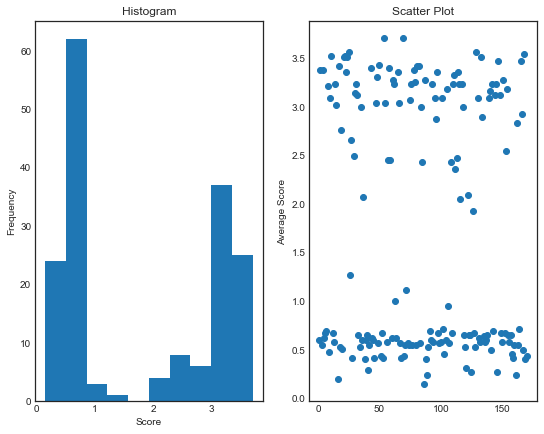

In [9]:
# thought this was interesting to add, what can we do with this?
divorces['avg_score'] = divorces.mean(axis=1)
divorces.head()  # now that we dropped our response variable, and added our new average score variable, we take another look

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 7))

ax1.hist(divorces.avg_score)
ax1.set_title('Histogram')
ax1.set_xlabel('Score')
ax1.set_ylabel('Frequency')

ax2.scatter([_ for _ in range(1,171)], divorces.avg_score)
ax2.set_title('Scatter Plot')
ax2.set_ylabel('Average Score')


By looking at this distribution, we can make an assumption that it is probably the low scores that are divorced; but we can't be sure. We will take a closer look at this to see if this is the case.

In [10]:
len(divorces.loc[divorces.avg_score <= 0.7])

84

In [11]:
len(divorces.loc[divorces.avg_score >= 2.5])


69

# Decision Trees

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)


pipe = Pipeline([('dtc', dt)])    
pipe.fit(X_train, y_train)
print("Decision Trees")
print("Training sample: ",pipe.score(X_train, y_train))
print("Testing sample:  ",pipe.score(X_test, y_test),'\n')

Decision Trees
Training sample:  1.0
Testing sample:   0.9615384615384616 



# Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier


random_forest = RandomForestClassifier(random_state = 42).fit(X_train, y_train)

pipe = Pipeline([('rf', random_forest)])    
pipe.fit(X_train, y_train)
print("Random Forest")
print("Training sample: ",pipe.score(X_train, y_train))
print("Testing sample:  ",pipe.score(X_test, y_test),'\n')

Random Forest
Training sample:  1.0
Testing sample:   0.9807692307692307 



# PCA

# Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression


logistic_regression = LogisticRegression(random_state = 42)

pipe = Pipeline([('lr', logistic_regression)])    
pipe.fit(X_train, y_train)
print("Logistic Regression")
print("Training sample: ",pipe.score(X_train, y_train))
print("Testing sample:  ",pipe.score(X_test, y_test),'\n')

Stochastic Gradient Descent
Training sample:  1.0
Testing sample:   0.9807692307692307 



# Stochastic Gradient Descent

In [15]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(max_iter=1000, tol=0.01)

pipe = Pipeline([('SGD_clf', sgd)])    
pipe.fit(X_train, y_train)
print("Stochastic Gradient Descent")
print("Training sample: ",pipe.score(X_train, y_train))
print("Testing sample:  ",pipe.score(X_test, y_test),'\n')

Stochastic Gradient Descent
Training sample:  1.0
Testing sample:   0.9615384615384616 



# Support Vector Machines

In [48]:
from sklearn.svm import SVC

svc = SVC(max_iter=1000, tol=0.01)

pipe = Pipeline([('SVC_clf', svc)])    
pipe.fit(X_train, y_train)
print("Support Vector Machine")
print("Training sample: ",pipe.score(X_train, y_train))
print("Testing sample:  ",pipe.score(X_test, y_test),'\n')

Support Vector Machine
Training sample:  0.9830508474576272
Testing sample:   0.9807692307692307 



# PCA

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler() 
scaler.fit(X_train)

StandardScaler()

In [30]:
X_tr_standart = scaler.transform(X_train)
X_tr_standart = pd.DataFrame(X_tr_standart, columns = X_train.columns)
X_tr_standart.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54
0,0.739304,1.567990,0.142284,0.983317,0.924788,-0.796719,0.597377,1.629507,0.358112,0.977100,...,0.352065,1.057305,1.094841,1.159311,1.038416,1.141603,1.266391,1.006155,1.188644,1.171534
1,-1.130079,-0.472703,-1.256838,-0.335222,-0.945926,-0.796719,-0.577465,-0.917272,-0.942109,-0.437597,...,-0.966782,-1.762176,-0.759579,0.253359,-0.300743,-0.283891,-0.340428,-0.950871,-1.420844,-1.181505
2,-1.130079,-1.152934,-1.256838,-0.994491,-0.945926,-0.796719,-0.577465,-0.917272,-0.942109,-0.437597,...,0.352065,-0.352435,-1.377719,-0.652592,-0.300743,-0.283891,-0.340428,-0.298529,-0.116100,-0.004985
3,0.739304,0.887759,0.841845,0.983317,0.924788,0.322481,0.597377,0.992812,1.008222,0.977100,...,0.352065,0.352435,0.476701,0.253359,0.368836,0.428856,0.462982,0.353813,0.536272,0.583275
4,-1.130079,-1.152934,-1.256838,-0.994491,-0.945926,-0.796719,-0.577465,-0.917272,-0.942109,-1.144945,...,0.352065,1.057305,-0.759579,-0.652592,-0.300743,-0.283891,-0.340428,0.353813,-0.116100,-0.004985


In [31]:
X_te_standart = scaler.transform(X_test)
X_te_standart = pd.DataFrame(X_te_standart, columns = X_test.columns)
X_te_standart.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54
0,1.362431,0.887759,0.841845,0.324048,1.548359,0.322481,-0.577465,0.992812,1.008222,0.269751,...,0.352065,0.352435,1.094841,0.253359,1.038416,1.141603,0.462982,1.006155,0.536272,1.171534
1,0.739304,1.567990,0.841845,0.983317,0.924788,-0.796719,0.597377,1.629507,1.008222,0.977100,...,0.352065,1.057305,0.476701,1.159311,0.368836,0.428856,1.266391,0.353813,1.188644,0.583275
2,-1.130079,-1.152934,-1.256838,-0.994491,-0.945926,-0.796719,-0.577465,-0.917272,-0.942109,-1.144945,...,-0.966782,0.352435,-1.377719,-0.652592,0.368836,0.428856,-0.340428,-0.950871,-1.420844,-1.181505
3,1.362431,0.887759,0.142284,0.983317,1.548359,0.322481,-0.577465,0.992812,0.358112,0.977100,...,0.352065,1.057305,0.476701,1.159311,0.368836,0.428856,1.266391,0.353813,1.188644,0.583275
4,1.362431,0.207528,0.841845,0.324048,1.548359,1.441681,-0.577465,0.356117,1.008222,0.269751,...,1.011489,1.057305,1.094841,1.159311,1.038416,1.141603,1.266391,1.006155,1.188644,1.171534


In [33]:
pca = PCA(n_components=54)
pca.fit(X_tr_standart)

PCA(n_components=54)

In [34]:
pca = PCA(n_components=54)
pca.fit(X_tr_standart)

PCA(n_components=54)

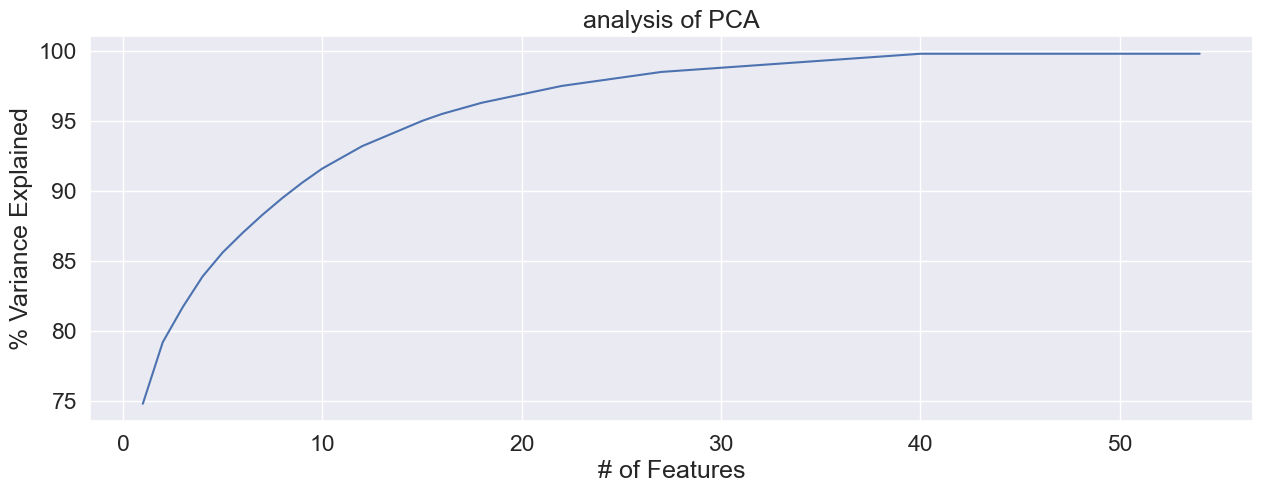

In [35]:
variance = pca.explained_variance_ratio_
var = np.cumsum (np.round (variance, 3) * 100) 

sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(15, 5))
plt.ylabel('% Variance Explained') 
plt.xlabel('# of Features') 
plt.title('analysis of PCA') 
sns.lineplot(x = range(1, 55), y = var);

In [37]:
pca = PCA(n_components = 0.99, svd_solver = 'full') 
pca.fit(X_tr_standart)
pca.n_components_

32

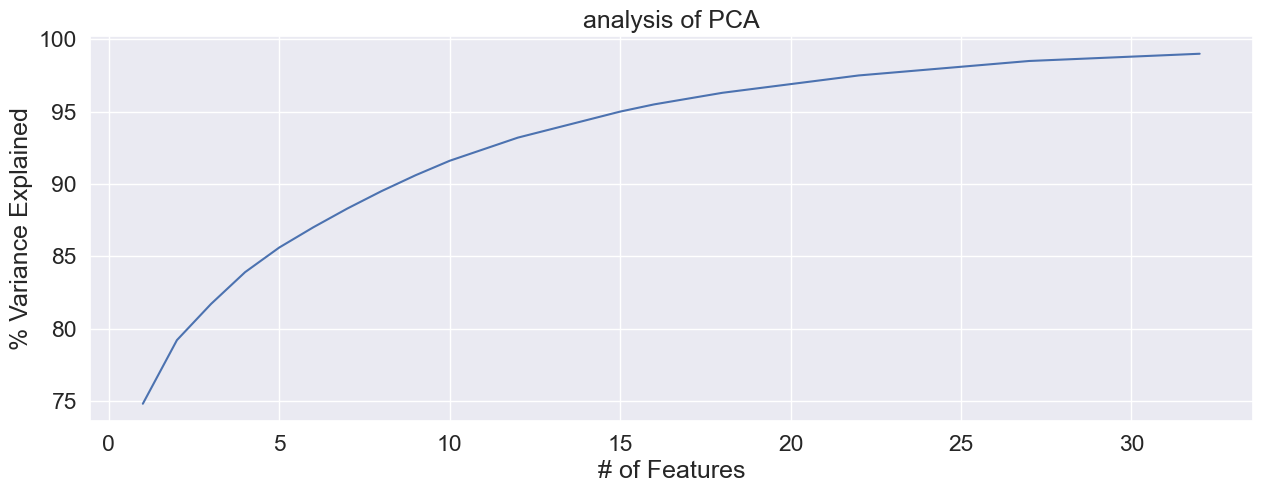

In [46]:
variance2 = pca.explained_variance_ratio_
var2 = np.cumsum (np.round (variance2, 3) * 100) 


sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(15, 5))
plt.ylabel('% Variance Explained') 
plt.xlabel('# of Features') 
plt.title('analysis of PCA') 
sns.lineplot(x = range(1, 33), y = var2);

# Executive Summary